In [3]:
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np

pdfFileObj = open('stat2_1.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)



pdfReader.getPage(10)

{'/Type': '/Page',
 '/Contents': {'/Filter': '/FlateDecode'},
 '/Resources': {'/ColorSpace': {'/pgfprgb': ['/Pattern', '/DeviceRGB']},
  '/Pattern': {},
  '/ExtGState': {},
  '/Font': {'/F22': {'/Type': '/Font',
    '/Subtype': '/Type1',
    '/BaseFont': '/WVEICD+LMSans12-Regular',
    '/FontDescriptor': {'/Type': '/FontDescriptor',
     '/FontName': '/WVEICD+LMSans12-Regular',
     '/Flags': 4,
     '/FontBBox': [-411, -308, 1407, 1154],
     '/Ascent': 694,
     '/CapHeight': 694,
     '/Descent': -194,
     '/ItalicAngle': 0,
     '/StemV': 86,
     '/XHeight': 444,
     '/CharSet': '/A/B/C/D/E/F/G/I/K/L/O/P/R/S/T/a/b/c/colon/d/e/f/ff/fi/g/h/hyphen/i/j/k/l/m/n/o/one/p/parenleft/parenright/period/quoteright/r/s/slash/t/two/u/v/w/x/y/z',
     '/FontFile': {'/Length1': 2394,
      '/Length2': 18926,
      '/Length3': 0,
      '/Filter': '/FlateDecode'}},
    '/FirstChar': 27,
    '/LastChar': 122,
    '/Widths': [571.2,
     523.2,
     523.2,
     795.2,
     795.2,
     489.6,
     3

In [5]:
!pip install pdf2image



You should consider upgrading via the '/Users/g0bel1n/PycharmProjects/pythonProject/basic_env/bin/python -m pip install --upgrade pip' command.


In [51]:
from tqdm import tqdm
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

pages = convert_from_path('stat2_1.pdf')
differentiated_pages=[]
for i in tqdm(range(1,len(pages))):
    differentiated_pages.append([np.count_nonzero(np.asarray(pages[i])-np.asarray(pages[i-1])),i,np.asarray(pages[i])-np.asarray(pages[i-1])])



100%|██████████| 110/110 [00:02<00:00, 47.46it/s]


In [52]:
idx_to_save

[1,
 2,
 4,
 5,
 6,
 8,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 48,
 49,
 51,
 53,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 82,
 84,
 85,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110]

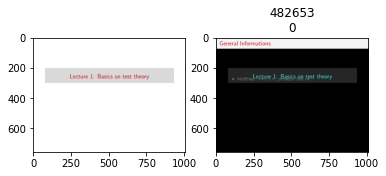

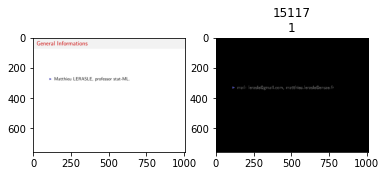

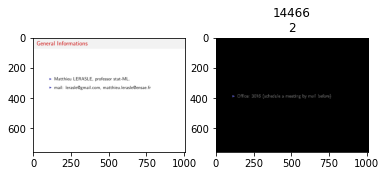

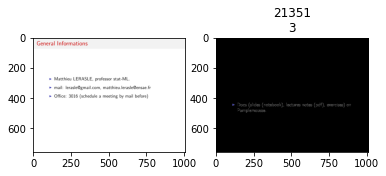

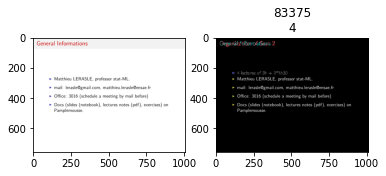

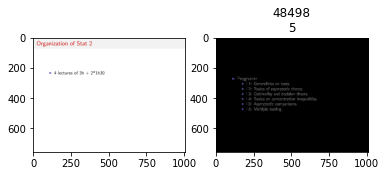

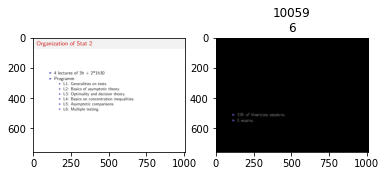

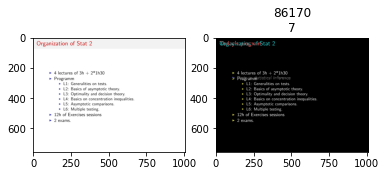

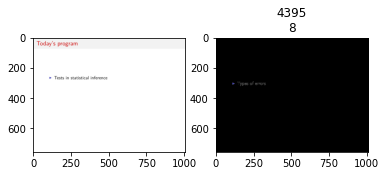

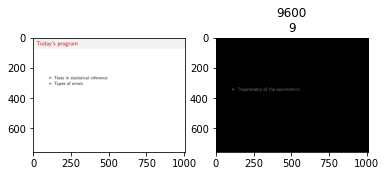

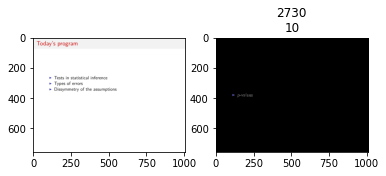

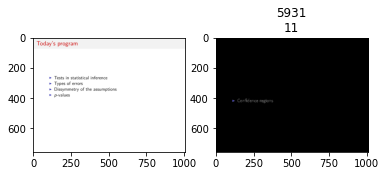

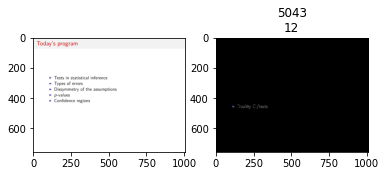

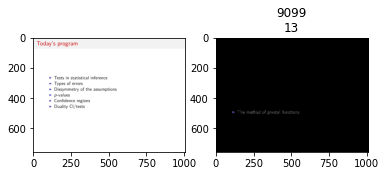

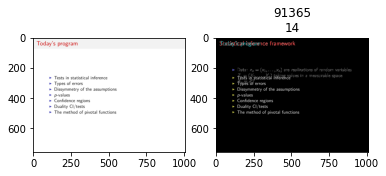

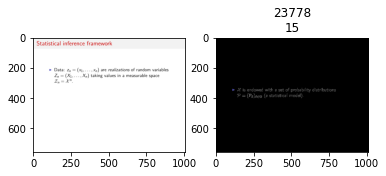

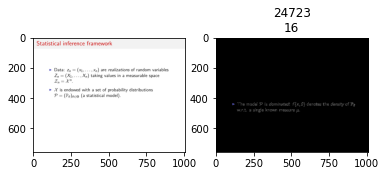

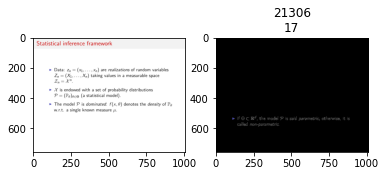

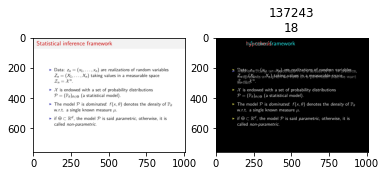

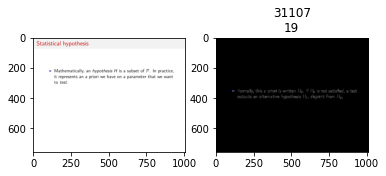

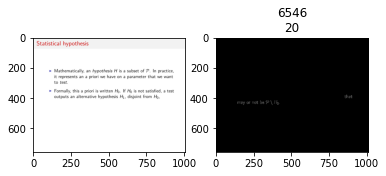

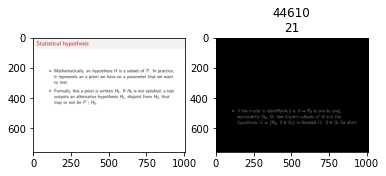

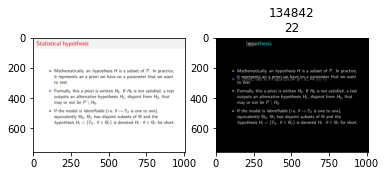

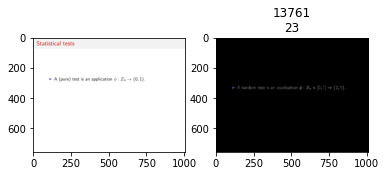

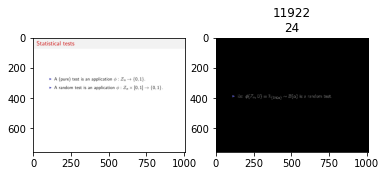

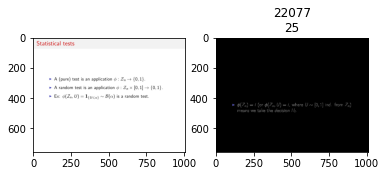

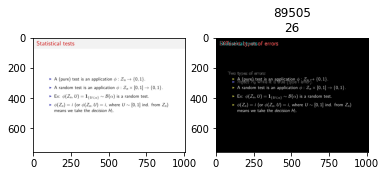

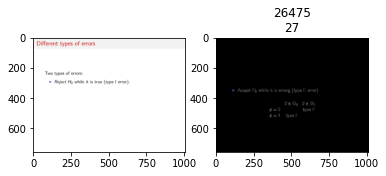

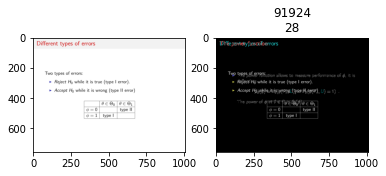

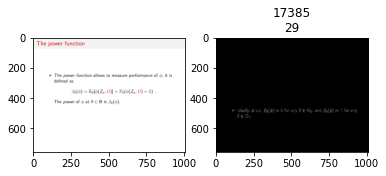

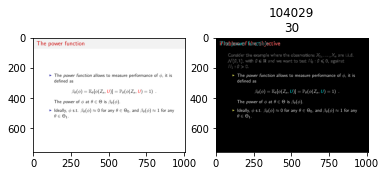

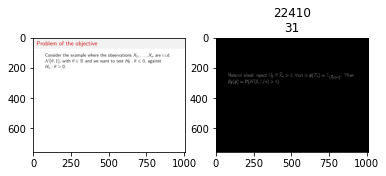

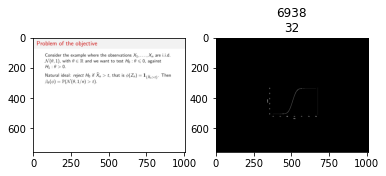

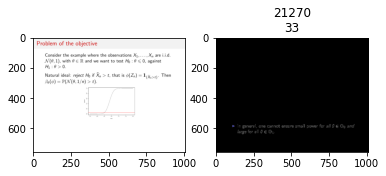

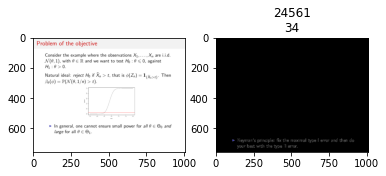

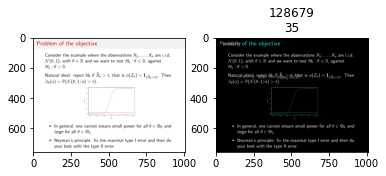

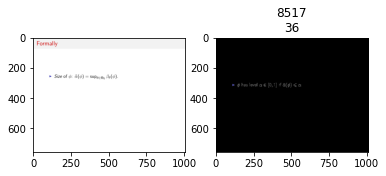

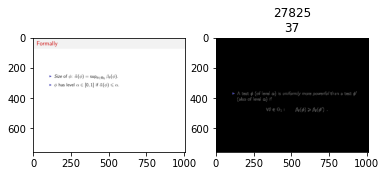

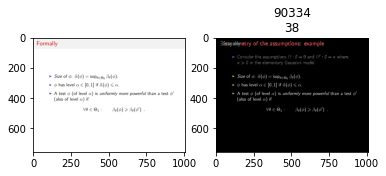

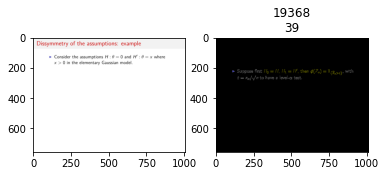

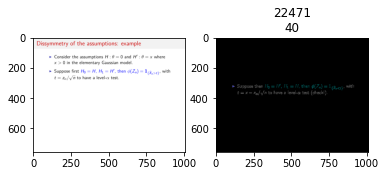

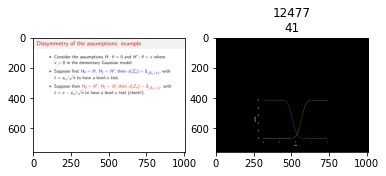

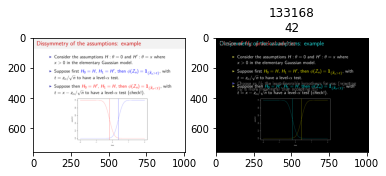

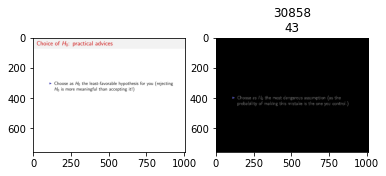

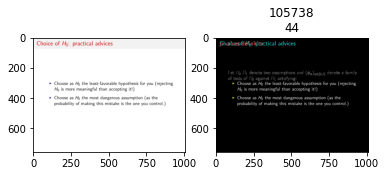

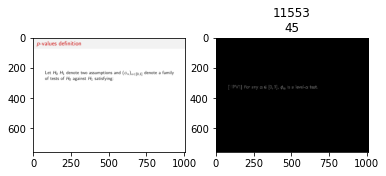

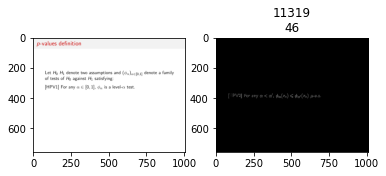

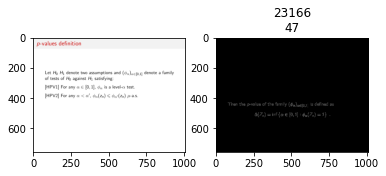

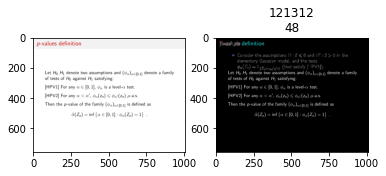

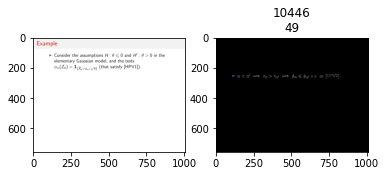

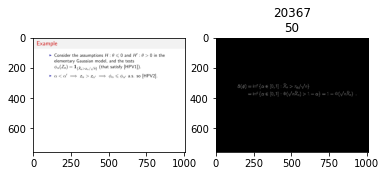

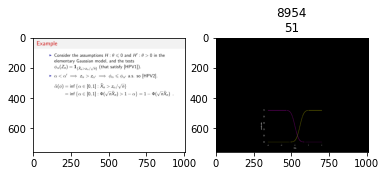

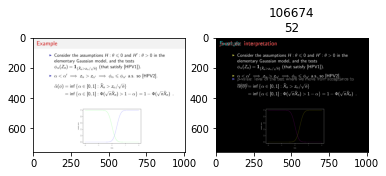

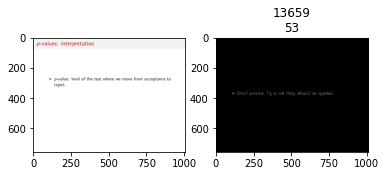

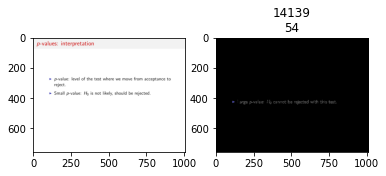

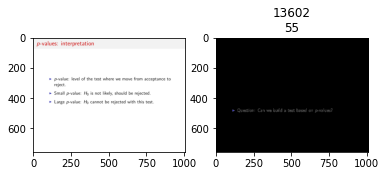

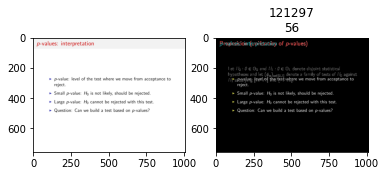

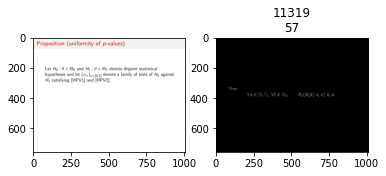

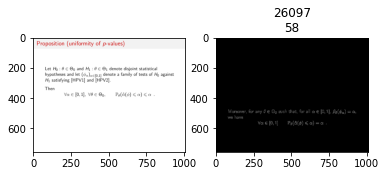

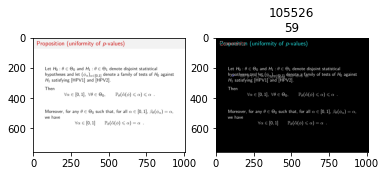

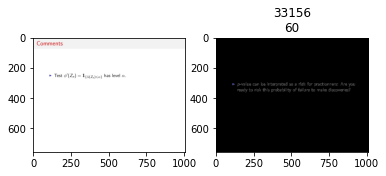

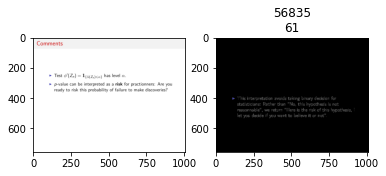

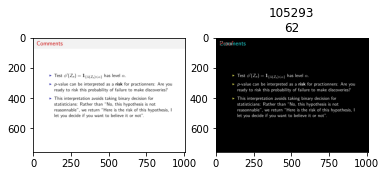

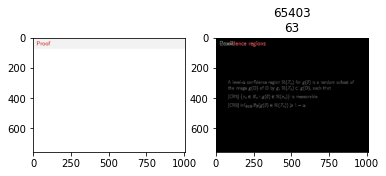

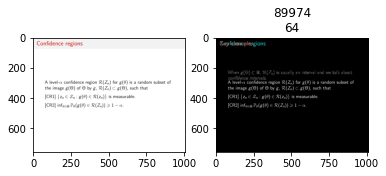

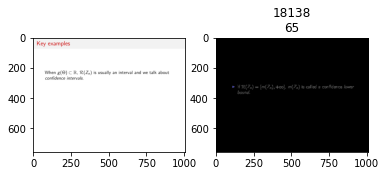

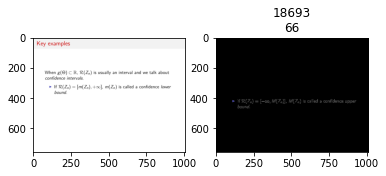

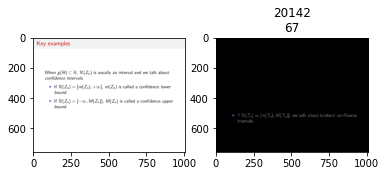

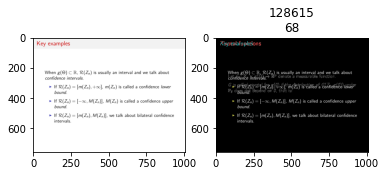

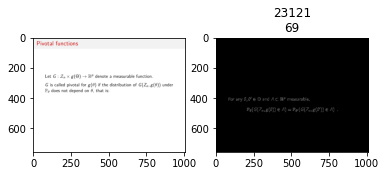

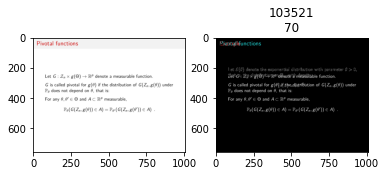

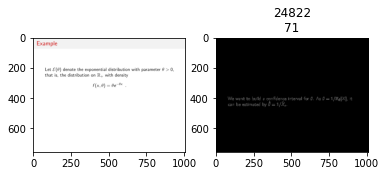

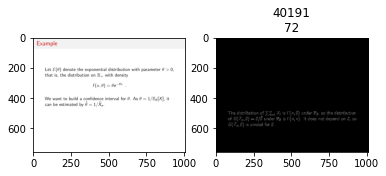

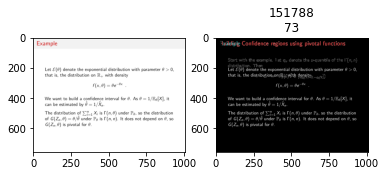

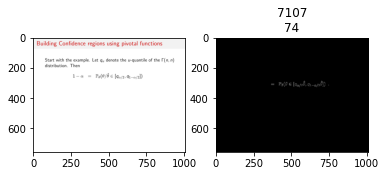

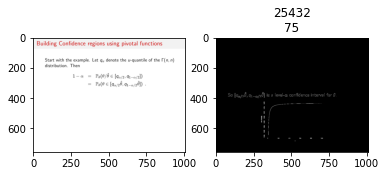

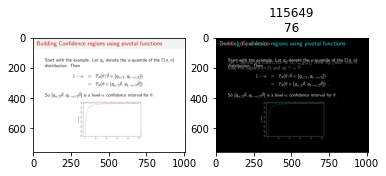

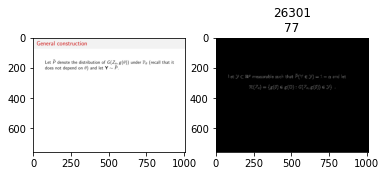

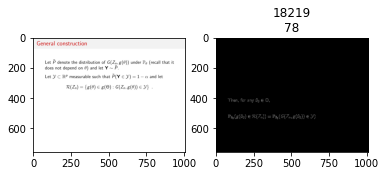

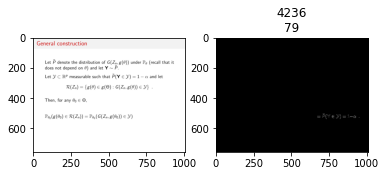

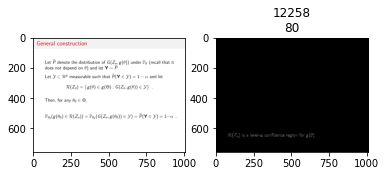

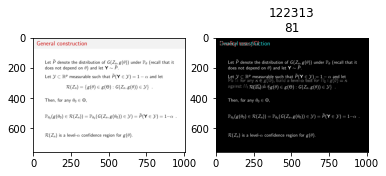

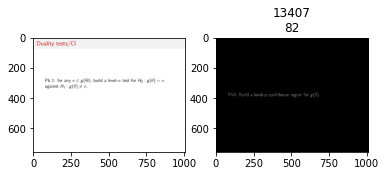

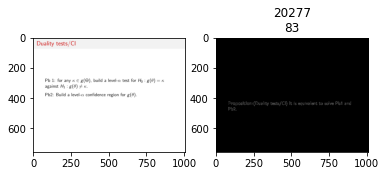

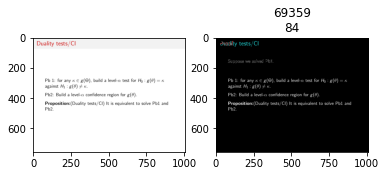

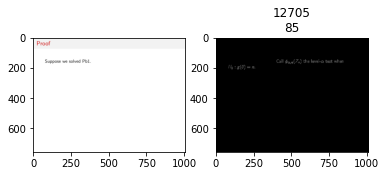

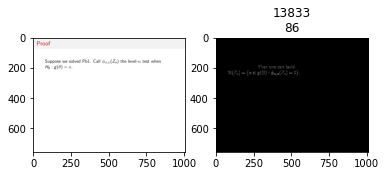

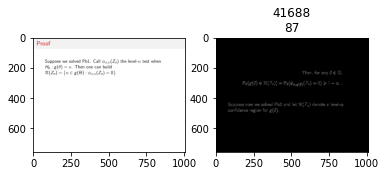

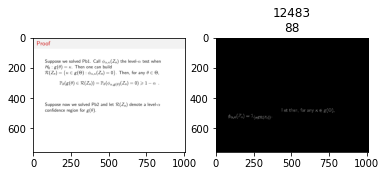

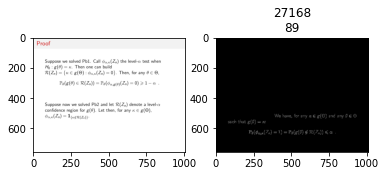

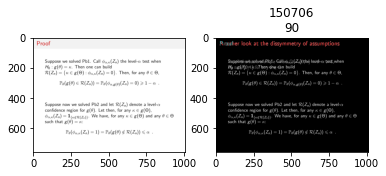

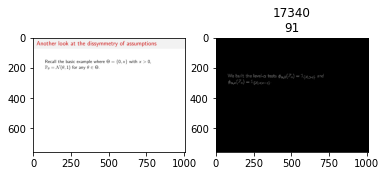

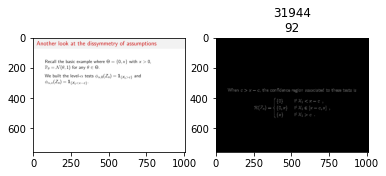

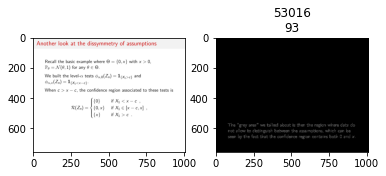

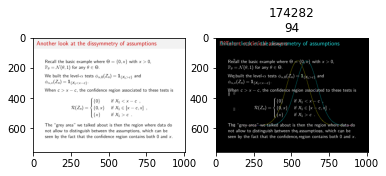

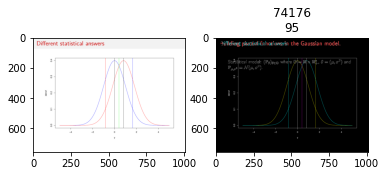

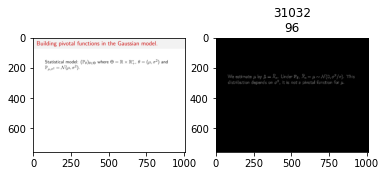

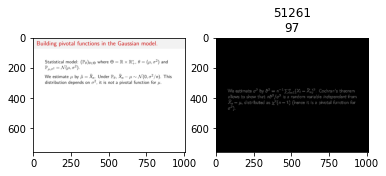

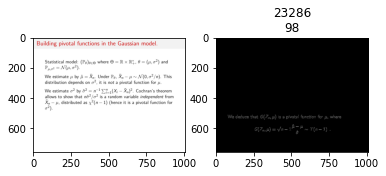

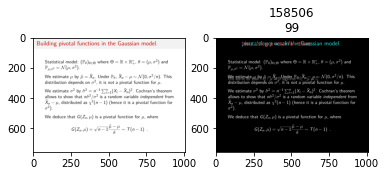

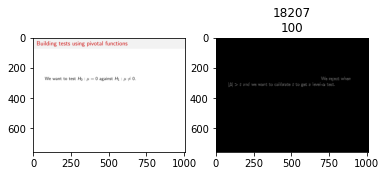

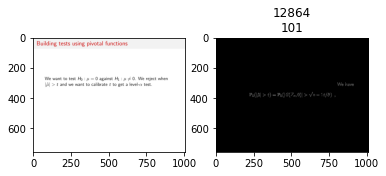

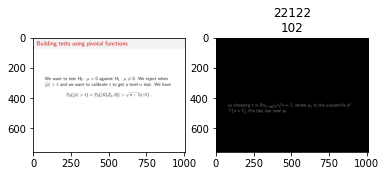

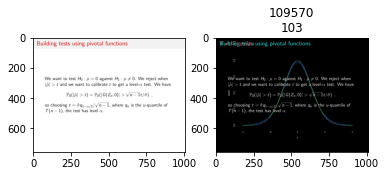

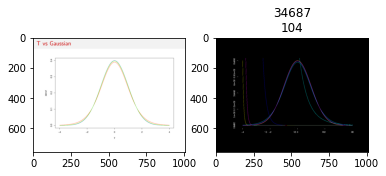

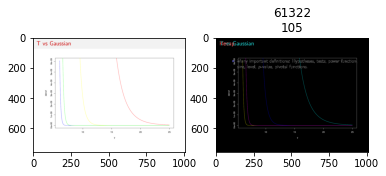

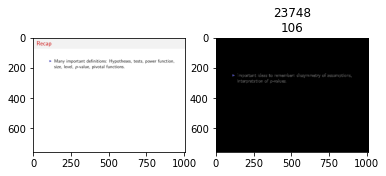

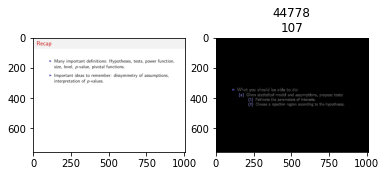

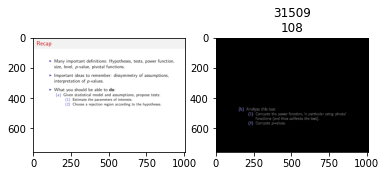

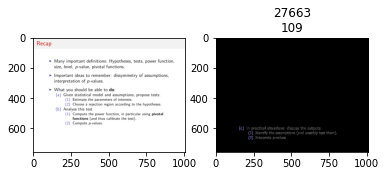

IndexError: list index out of range

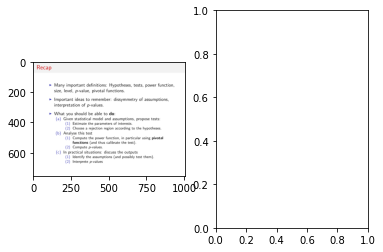

In [59]:
for i in range(0,300):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(pages[i])
    ax2.imshow(differentiated_pages[i][2])
    plt.title(str(differentiated_pages[i][0]) + '\n' + str(i))
    plt.show()

In [63]:
idx_to_save

[1,
 5,
 8,
 15,
 19,
 23,
 27,
 29,
 31,
 36,
 39,
 43,
 45,
 49,
 53,
 57,
 60,
 63,
 64,
 65,
 69,
 71,
 74,
 77,
 82,
 85,
 91,
 95,
 96,
 100,
 104,
 106]

In [69]:
idx_to_save = [page[1]-1 for page in differentiated_pages if page[0]>60000] + [len(pages)-1]



from PyPDF2 import PdfFileReader, PdfFileWriter

pdf_file_path = 'stat2_1.pdf'
file_base_name = pdf_file_path.replace('.pdf', '')

pdf = PdfFileReader(pdf_file_path)

pdfWriter = PdfFileWriter()

for idx in idx_to_save:
    pdfWriter.addPage(pdf.getPage(idx))

with open('{0}_subset.pdf'.format(file_base_name), 'wb') as f:
    pdfWriter.write(f)
    f.close()